# Analyzing and Handling Missing Data from a Stack Overflow Survey

A portfolio project completed for my Codecademy Data Scientist: Machine Learning Engineer certification.

Robert Hall
Began 05/17/2024

### Step 1: Import the data and develop some observations

In [2]:
# import libraries to be used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# retrieve data from CSV and convert into DataFrame
data = pd.read_csv('developer_dataset.csv')
print(data.columns)

# warning about mixed datatypes will be addressed further down

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


C:\Users\rhall\AppData\Local\Temp\ipykernel_19028\441863751.py:2: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('developer_dataset.csv')


In [4]:
# print the first 5 rows of each column to get overview of tabular structure
data.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


In [5]:
# return counts of non-null data points in each feature
data.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [6]:
# print descriptive statistics for all numerical columns
data.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


### Step 2: Delete missing data in rows with > 60% missing values

In [7]:
# determine percentage missing data
total_rows = data['RespondentID'].count()

missing_data = round((1 - data.count() / total_rows) * 100, 2)

print("Percent Missing Data")
print(missing_data)

Percent Missing Data
RespondentID               0.00
Year                       0.00
Country                    0.00
Employment                 1.60
UndergradMajor            11.47
DevType                    9.69
LanguageWorkedWith         8.26
LanguageDesireNextYear    13.64
DatabaseWorkedWith        22.79
DatabaseDesireNextYear    33.25
PlatformWorkedWith        17.62
PlatformDesireNextYear    23.23
Hobbyist                  38.54
OrgSize                   50.72
YearsCodePro              14.76
JobSeek                   45.55
ConvertedComp             17.87
WorkWeekHrs               54.06
NEWJobHunt                82.80
NEWJobHuntResearch        83.20
NEWLearn                  78.22
dtype: float64


In [8]:
data_to_remove = missing_data >= 60.0
print(data_to_remove)

RespondentID              False
Year                      False
Country                   False
Employment                False
UndergradMajor            False
DevType                   False
LanguageWorkedWith        False
LanguageDesireNextYear    False
DatabaseWorkedWith        False
DatabaseDesireNextYear    False
PlatformWorkedWith        False
PlatformDesireNextYear    False
Hobbyist                  False
OrgSize                   False
YearsCodePro              False
JobSeek                   False
ConvertedComp             False
WorkWeekHrs               False
NEWJobHunt                 True
NEWJobHuntResearch         True
NEWLearn                   True
dtype: bool


In [9]:
# drop NEWJobHunt, NEWJobHuntResearch and NEWLearn from the dataframe
data.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'],
          axis=1,
          inplace=True)

data.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141000.0,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,AWS;Docker;Linux;MacOS;Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,NaN,4.0,NaN,48000.0,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0


### Step 3. Analyze developers by country of origin

In [10]:
data[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


In [11]:
# develop a table of null-value quantities for the Employment and DevType columns, grouped by Country
missing_data = data[['Employment', 'DevType']].isnull().groupby(data['Country']).sum().reset_index()
missing_data

,Country,Employment,DevType
0,Canada,148,944
1,China,139,491
2,France,104,848
3,Germany,386,1691
4,Japan,13,109
5,Mexico,25,207
6,Spain,74,434
7,United Kingdom,196,1472
8,United States,699,4580


Text(0.5, 0.98, 'Missing Data in Developer Type Column with respect to Country of Origin')

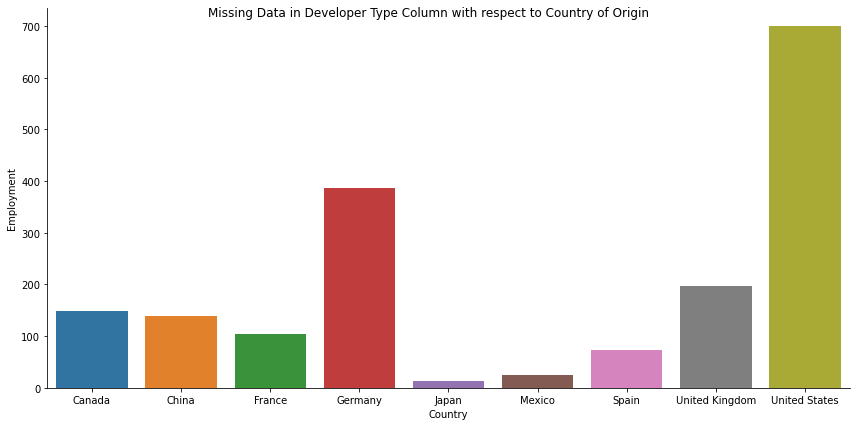

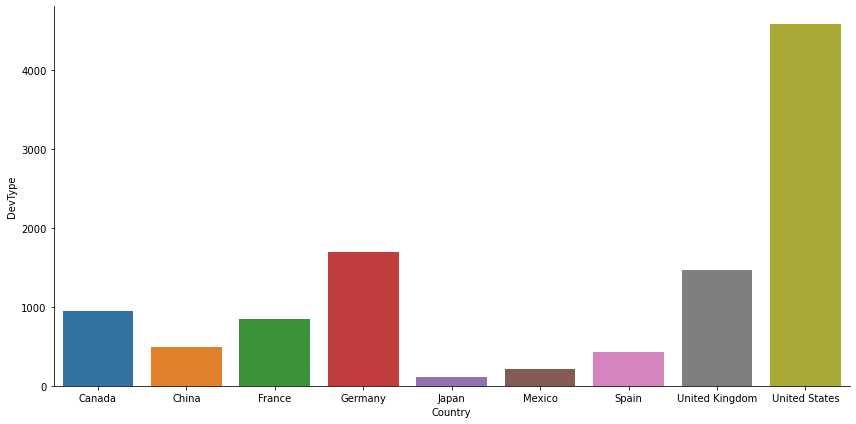

In [12]:
# plot the amount of missing data in the Employment and Developer Type (DevType)
# columns, grouped by country of origin.

data[['RespondentID','Country']].groupby('Country').count()

missingData = data[['Employment','DevType']].isnull().groupby(data['Country']).sum().reset_index()

A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
A.figure.suptitle("Missing Data in Employment Column with respect to Country of Origin")
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)
A.figure.suptitle("Missing Data in Developer Type Column with respect to Country of Origin")

Missing data in each country is roughly proportional to the size of the country represented in the sample, therefore the missing data in these columns is, most likely, missing completely at random.

### Step 4: Drop missing data from MCAR Employment and Developer Type (DevType) columns using pairwise deletion

In [13]:
data.dropna(subset=['Employment', 'DevType'],
            inplace=True,
            how='any')

# Display sum total of missing data in the two columns, grouped by country of origin
data[['Employment', 'DevType']].isnull().groupby(data['Country']).sum().reset_index()

,Country,Employment,DevType
0,Canada,0,0
1,China,0,0
2,France,0,0
3,Germany,0,0
4,Japan,0,0
5,Mexico,0,0
6,Spain,0,0
7,United Kingdom,0,0
8,United States,0,0


### Step 5: Determine the quantities of a given developer type present in each country

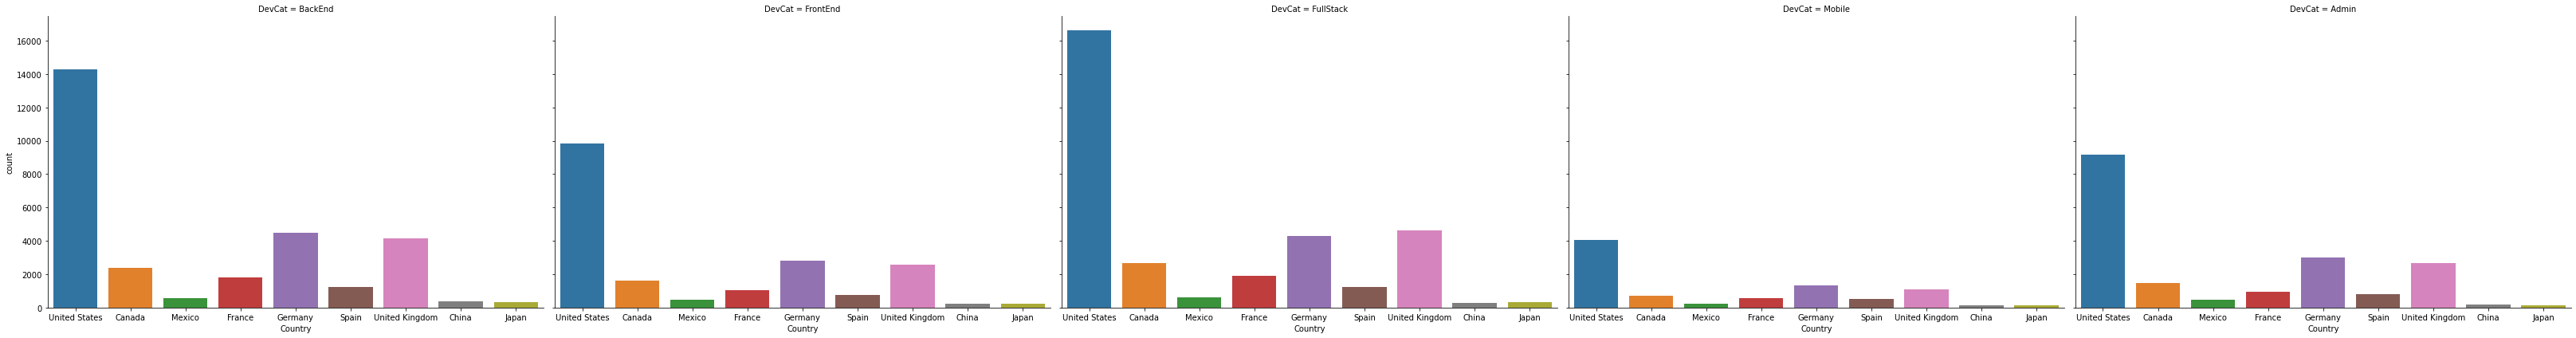

In [14]:
# create an isolated dataframe with only the necessary data for this task
dev_data = data[['Country', 'DevType']].copy()
dev_data.head()

# create boolean features for each developer type
dev_data.loc[dev_data['DevType'].str.contains('back-end'), 'BackEnd'] = True
dev_data.loc[dev_data['DevType'].str.contains('front-end'), 'FrontEnd'] = True
dev_data.loc[dev_data['DevType'].str.contains('full-stack'), 'FullStack'] = True
dev_data.loc[dev_data['DevType'].str.contains('mobile'), 'Mobile'] = True
dev_data.loc[dev_data['DevType'].str.contains('administrator'), 'Admin'] = True

dev_data = dev_data.melt(id_vars=['Country'], 
                         value_vars=['BackEnd',
                                     'FrontEnd',
                                     'FullStack',
                                     'Mobile',
                                     'Admin'], 
                         var_name='DevCat',
                         value_name='DevFlag')

# drop null values (irrelevant to visualizing)
dev_data.dropna(how='any', inplace=True)

# plot data
devFig = sns.catplot(x="Country", col="DevCat",
                     data=dev_data, kind="count",
                     height=6, aspect=1.5)

### Step 6: Observe the trend in missing or no undergraduate major declarations in the survey among developers over the years

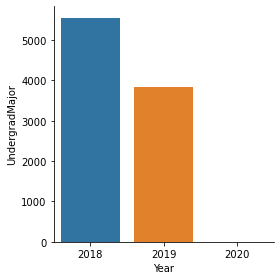

In [15]:
# analyze the amount of missing data for the Undergraduate Major (UndergradMajor)
# column for each year surveyed.
no_undergraduate = data['UndergradMajor'].isnull().groupby(data['Year']).sum().reset_index()
sns.catplot(x='Year',
            y='UndergradMajor',
            data=no_undergraduate,
            kind='bar',
            height=4, aspect=1)

### Step 7: Fill in missing undergraduate data, carrying next observation backward (NOCB)

In [16]:
# sort dataset in terms of RespondentID and in
# chronological order
data = data.sort_values(['RespondentID', 'Year'])

# use NOCB to fill missing data points in the 
# UndergradMajor column
data['UndergradMajor'].bfill(axis=0, inplace=True)

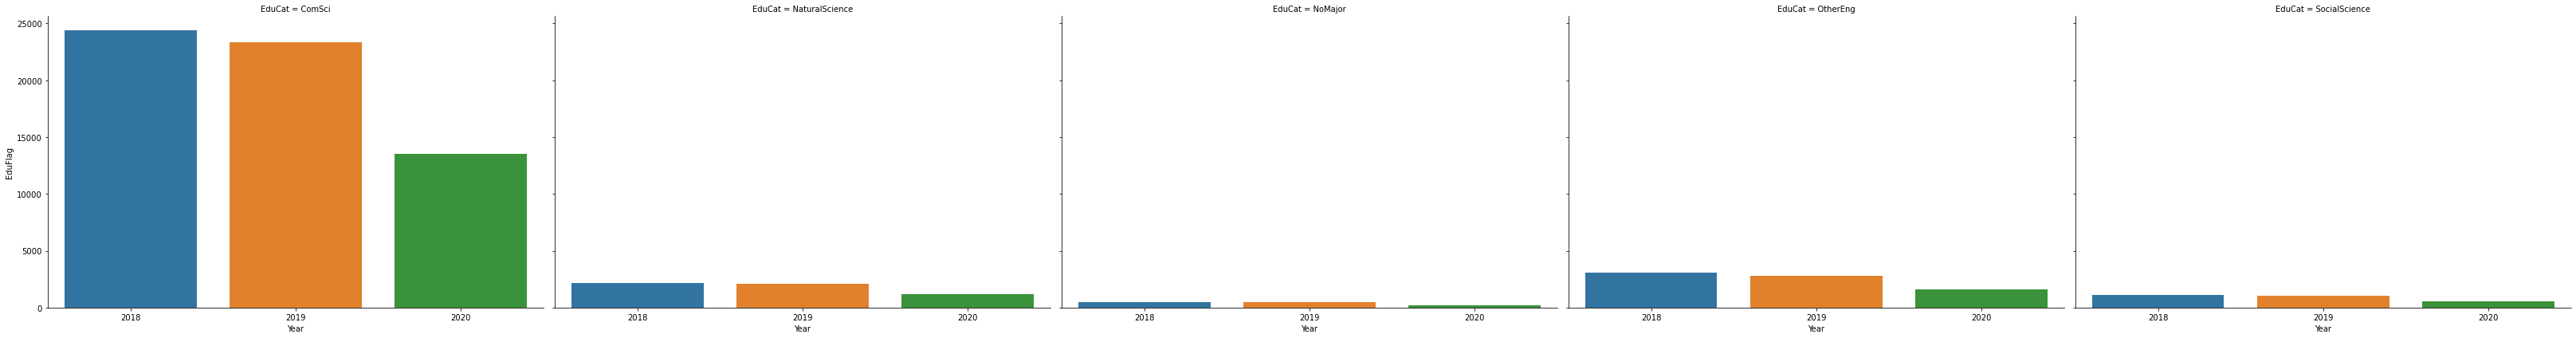

In [20]:
# list of most prominent major groups in S/O survey
majors = ['social science',
          'natural science',
          'computer science',
          'development',
          'another engineering',
          'never declared']

# create new dataframe containing Year and Undergraduate
# major (UndergradMajor) data, and drop all null values
edu_data = data[['Year', 'UndergradMajor']].copy()
edu_data.dropna(how='any', inplace=True)

# create boolean columns for each major type
edu_data.loc[edu_data['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edu_data.loc[edu_data['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edu_data.loc[edu_data['UndergradMajor'].str.contains('(?i)Computer science'), 'ComSci'] = True
edu_data.loc[edu_data['UndergradMajor'].str.contains('(?i)development'), 'Comsci'] = True
edu_data.loc[edu_data['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edu_data.loc[edu_data['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

# melt the boolean columns into variable name "EduCat"
# (education category)
edu_data = edu_data.melt(id_vars=['Year'],
                         value_vars=['SocialScience',
                                     'NaturalScience',
                                     'ComSci',
                                     'OtherEng',
                                     'NoMajor'],
                        var_name='EduCat',
                        value_name='EduFlag')

# drop null data in modified dataframe and group by 
# Year and education category (EduCat)
edu_data.dropna(how='any', inplace=True)
edu_data = edu_data.groupby(['Year', 'EduCat']).count().reset_index()

# create a categorical plot (seaborn catplot) to visualize
# the disparities in majors among surveyed developers
edu_fig = sns.catplot(x='Year', y='EduFlag',
                      col='EduCat',
                      data=edu_data,
                      kind='bar',
                      height=6, aspect=1.5)

### Step 8: Examine relationship between years of experience and compensation across all surveyed developers, for each year

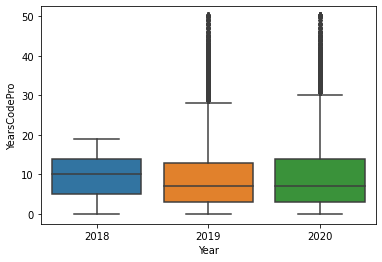

In [25]:
# create dataframe to isolate necessary data 
comp_fields = data[['Year', 
                    'YearsCodePro', 
                    'ConvertedComp']]

# generate plot to analyze relationship between
# years of professional experience and compensation
prof_years_plot = sns.boxplot(x='Year',
                              y='YearsCodePro',
                              data=comp_fields)

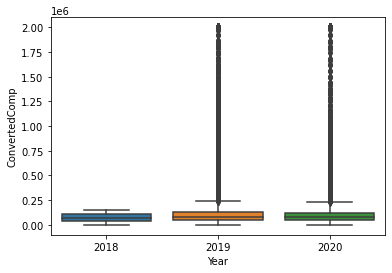

In [26]:
# generate plot to analyze relationship between 
# years of professional experience and scaled
# compensation factor
converts_plot = sns.boxplot(x='Year',
                            y='ConvertedComp',
                            data=comp_fields)

### Step 9: Fill in missing data points, generating well-fitted data and using multiple imputation

In [28]:
# import necessary libraries
import numpy as np 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [29]:
# isolate features to be imputed
impute_data = data[['YearsCodePro', 'ConvertedComp']]

# generate training and test data from the impute dataframe
train_data, test_data = train_test_split(impute_data,
                                         train_size=0.1)

# invoke IterativeImputer method to predict missing
# data points
imp = IterativeImputer(max_iter=20,
                       random_state=0)

# apply impute data (YearsCodePro, ConvertedComp) to 
# sklearn.impute.IterativeImputer
imp.fit(impute_data)

# apply missing data to columns YearsCodePro, ConvertedComp
comp_data = pd.DataFrame(np.round(imp.transform(impute_data), 0),
                         columns=['YearsCodePro',
                                  'ConvertedComp'])

In [32]:
# verify that no missing data exists in either column
comp_data.isnull().sum().reset_index()

,index,0
0,YearsCodePro,0
1,ConvertedComp,0


### Step 10: Examine relationship between years of professional experience (YearsCodePro) and ConvertedComp post-imputation

<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

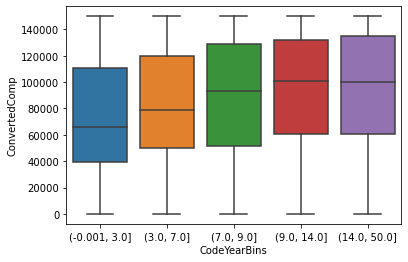

In [34]:
# generate new dataset to plot that excludes large outliers
comp_plot_data = comp_data.loc[comp_data['ConvertedComp'] <= 150000].copy()

# create new feature CodeYearBins that slices YearsCodePro into quantile intervals 
comp_plot_data['CodeYearBins'] = pd.qcut(comp_plot_data['YearsCodePro'], q=5)

# generate a boxplot to examine relationship between 
sns.boxplot(x='CodeYearBins',
            y='ConvertedComp',
            data=comp_plot_data)

### Summary Analysis and Overall Takeaways